**Problem statement**

**Financial institutions incur significant losses due to the default of vehicle 
loans. This has led to the tightening up of vehicle loan underwriting and 
increased the vehicle loan rejection rates. The need for a better credit 
risk scoring model among these institutions also gets created. This 
warrants a study to estimate the determinants of vehicle loan default.**

**1.Perform preliminary data inspection and report the findings as the structure of the data, missing values, duplicates, etc**

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy.stats import ttest_rel,ttest_ind,chisquare,chi2_contingency

In [40]:
df = pd.read_csv("data.csv")
df.shape

(233154, 41)

In [5]:
df.head(10)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
2,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
3,529269,46349,61500,76.42,67,22807,45,1502,1988-06-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
4,563215,43594,78256,57.50,67,22744,86,1499,1994-07-14,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
5,498082,73123,92900,79.66,67,22807,45,1480,1989-01-02,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
6,586411,55213,68600,83.09,67,22807,45,1494,1986-01-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
7,440293,53713,61780,89.83,67,22807,45,1468,1968-08-02,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1
8,566763,57713,68040,86.27,67,22807,45,1497,1976-01-01,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1
9,525983,46549,69518,69.05,67,22744,86,1480,1990-05-23,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

Numeric fields are stored correctly, but date fields are stored as objects and need conversion.

In [ ]:
df.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


**2.Variable names in the data may not be in accordance with the identifier naming in Python so, 
change the variable names accordingly**

In [6]:
df.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [7]:
df.columns = (df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('.', '_', regex=False))

In [8]:
df.columns

Index(['uniqueid', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'current_pincode_id', 'date_of_birth',
       'employment_type', 'disbursaldate', 'state_id', 'employee_code_id',
       'mobileno_avl_flag', 'aadhar_flag', 'pan_flag', 'voterid_flag',
       'driving_flag', 'passport_flag', 'perform_cns_score',
       'perform_cns_score_description', 'pri_no_of_accts', 'pri_active_accts',
       'pri_overdue_accts', 'pri_current_balance', 'pri_sanctioned_amount',
       'pri_disbursed_amount', 'sec_no_of_accts', 'sec_active_accts',
       'sec_overdue_accts', 'sec_current_balance', 'sec_sanctioned_amount',
       'sec_disbursed_amount', 'primary_instal_amt', 'sec_instal_amt',
       'new_accts_in_last_six_months', 'delinquent_accts_in_last_six_months',
       'average_acct_age', 'credit_history_length', 'no_of_inquiries',
       'loan_default'],
      dtype='object')

**3.The presented data might also contain some missing values therefore, exploration will also lead 
to devising strategies to fill in the missing values while exploring the data**

In [ ]:
df.isnull().sum()

uniqueid                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
current_pincode_id                        0
date_of_birth                             0
employment_type                        7661
disbursaldate                             0
state_id                                  0
employee_code_id                          0
mobileno_avl_flag                         0
aadhar_flag                               0
pan_flag                                  0
voterid_flag                              0
driving_flag                              0
passport_flag                             0
perform_cns_score                         0
perform_cns_score_description             0
pri_no_of_accts                           0
pri_active_accts                

Employment.Type has 7.6k missing values

**4.Explain how is the target variable distributed overall**

Text(0.5, 1.0, 'Distribution of Loan Default')

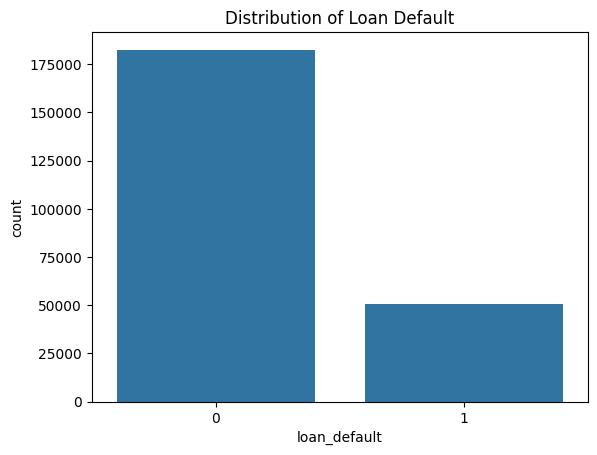

In [ ]:
sns.countplot(data=df,x='loan_default')
plt.title('Distribution of Loan Default')

The target variable loan_default is slightly imbalanced with the majority of customers not defaulting on their loans and a smaller proportion who did

**5. Study the distribution of the target variable across various categories like branch, city, state,
 branch, supplier, manufacturer, etc.**

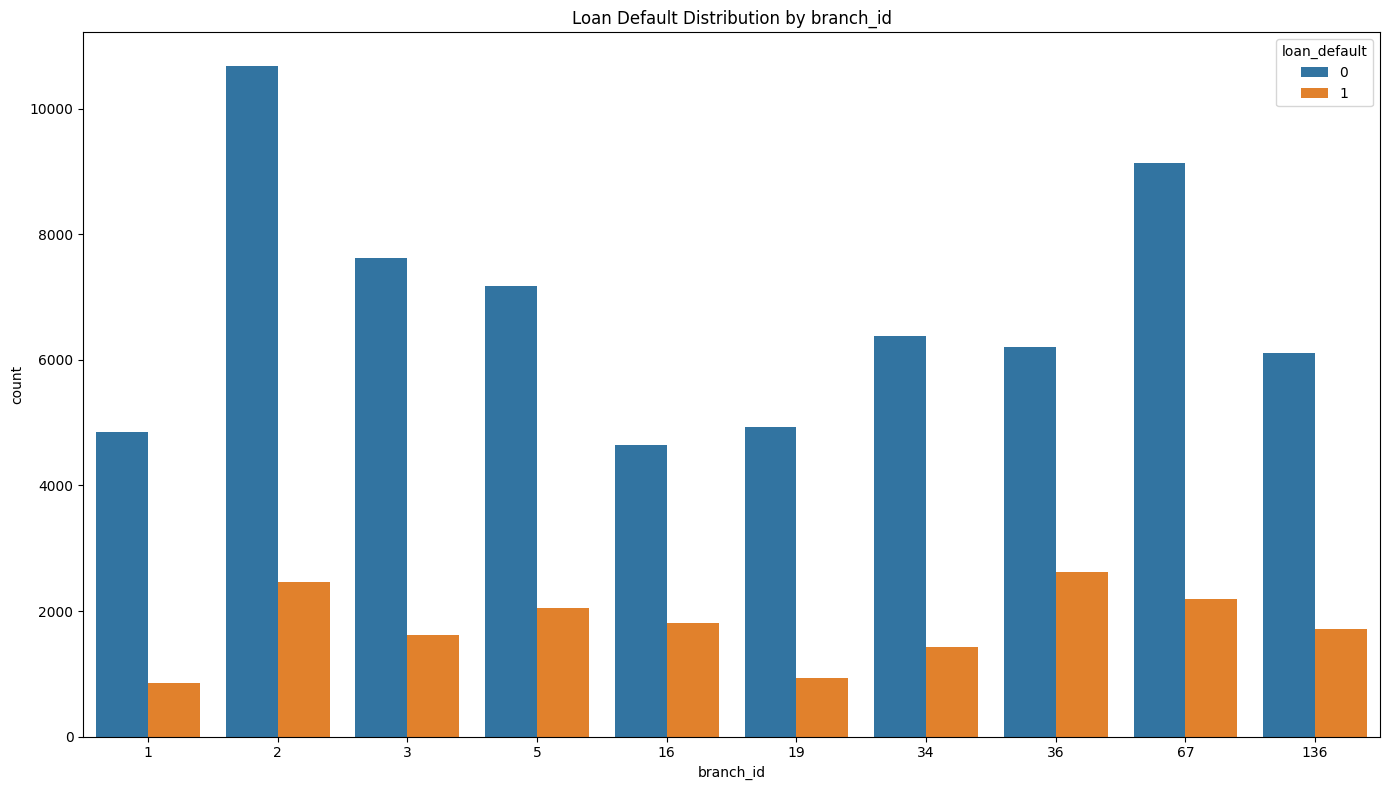

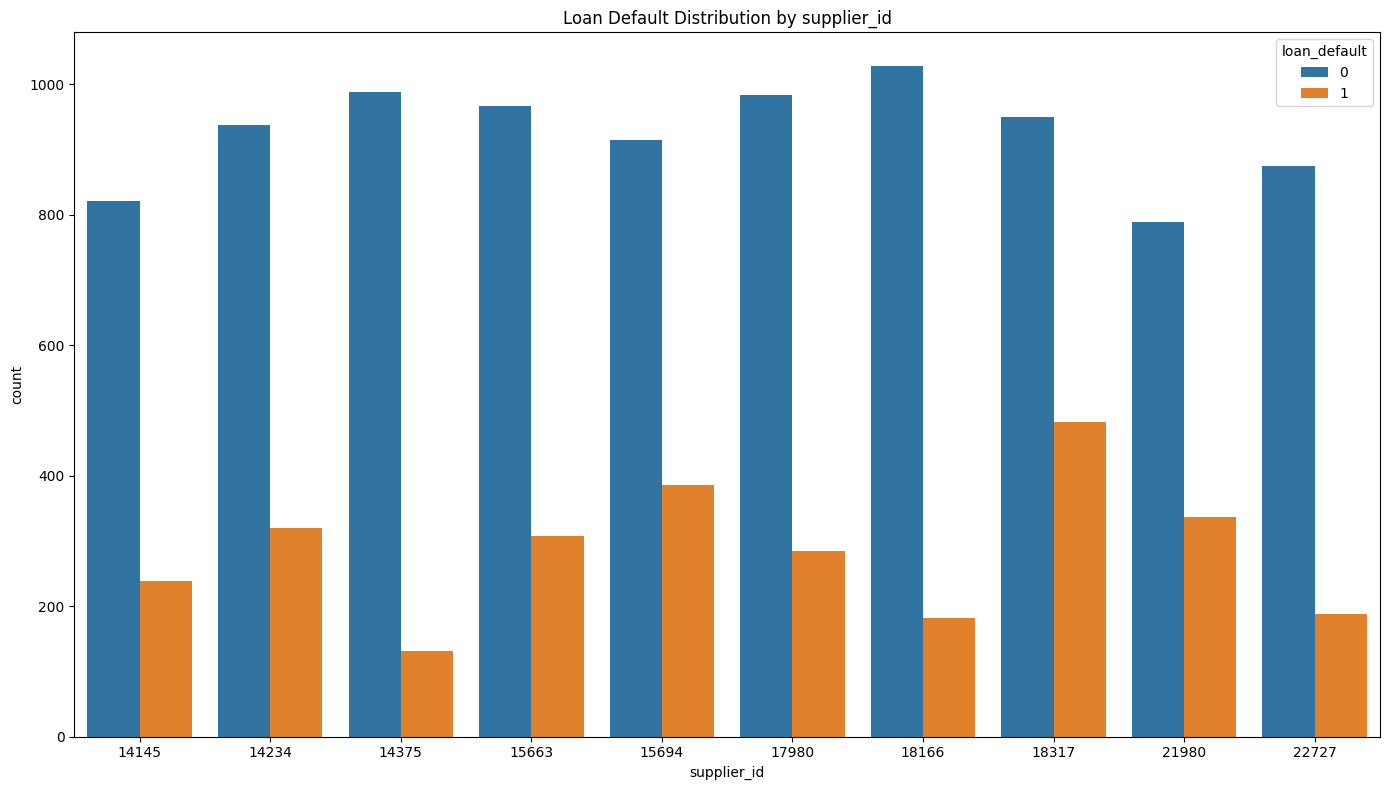

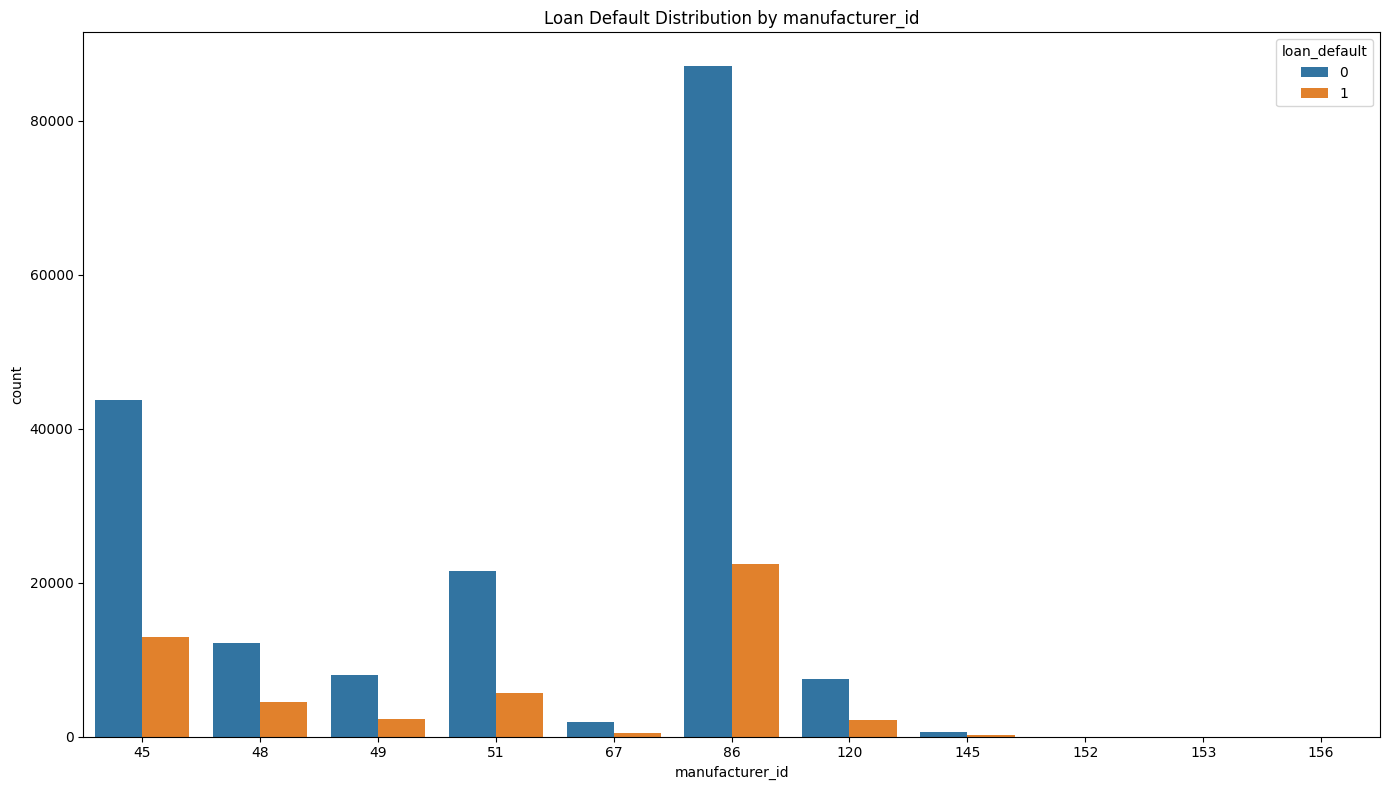

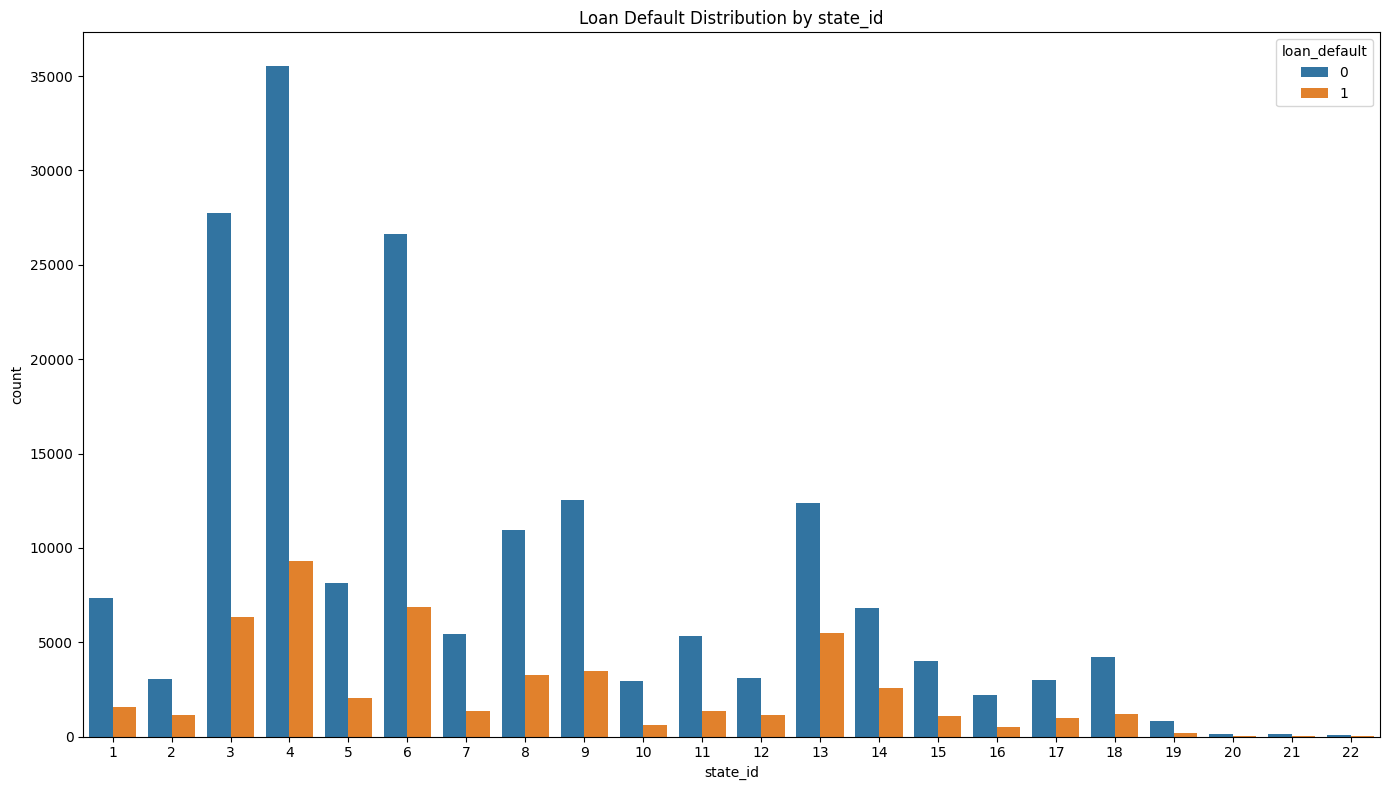

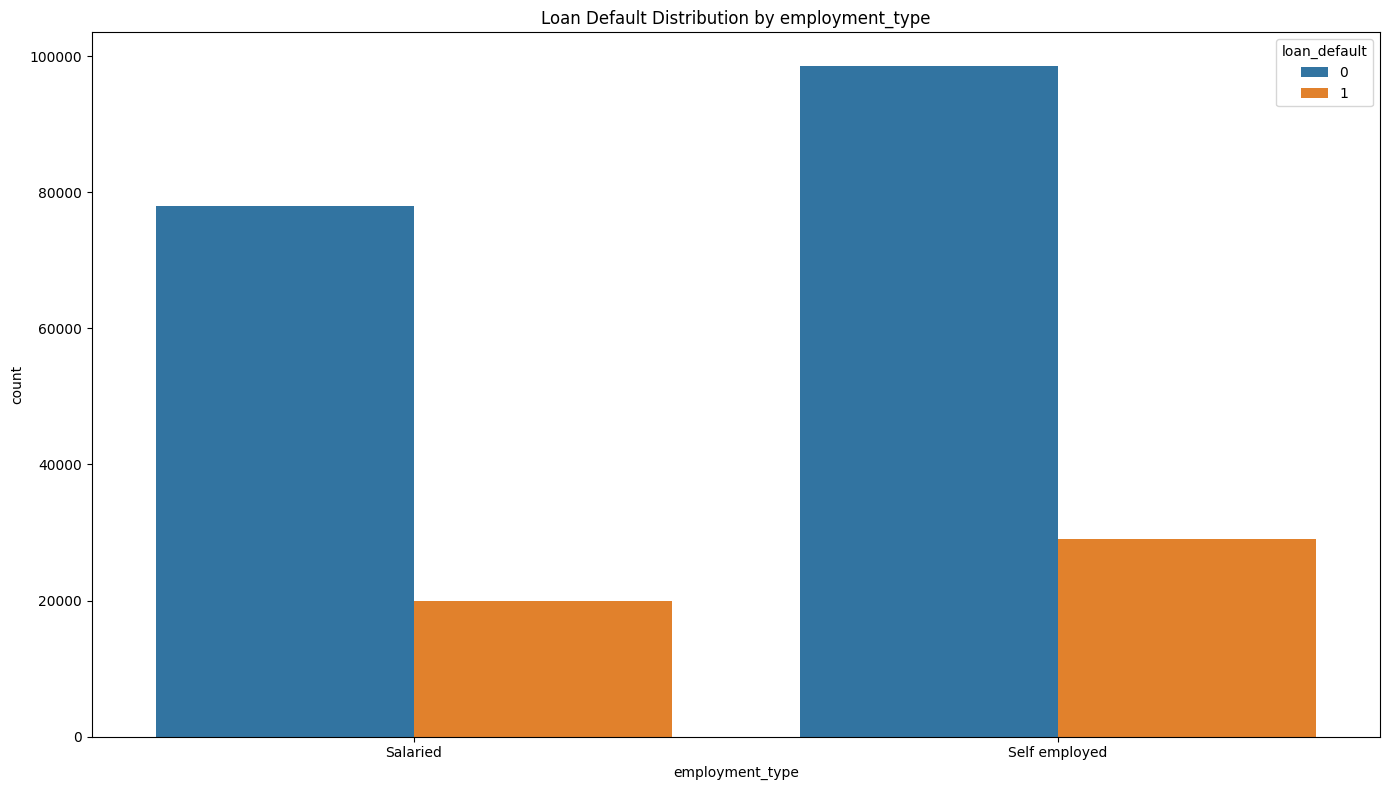

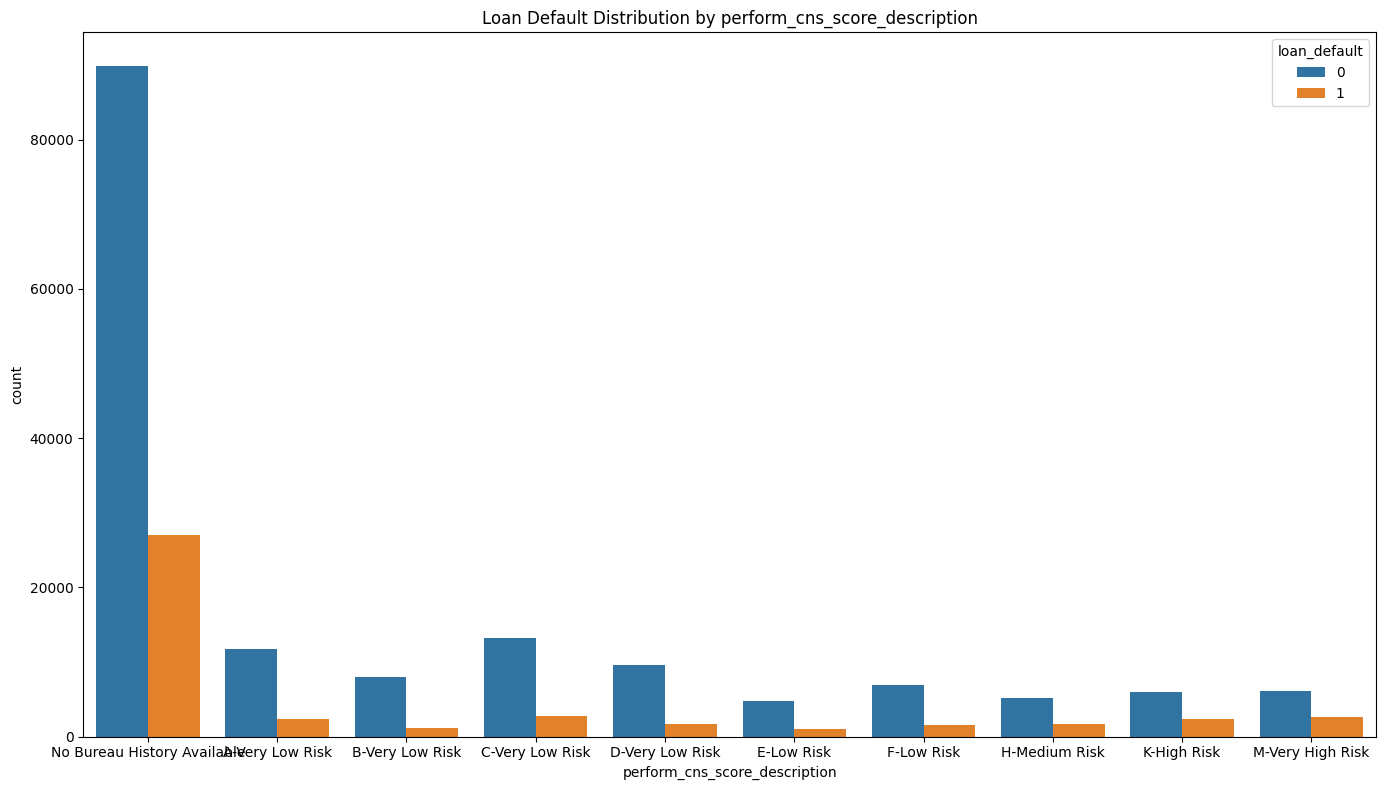

In [ ]:
categories = ['branch_id', 'supplier_id', 'manufacturer_id', 'state_id', 'employment_type', 'perform_cns_score_description']
for col in categories:
    if col in ['branch_id', 'supplier_id','perform_cns_score_description']: # top 10 values are shown to keep the plots clean and easy to read.
        top_values = df.groupby(col).size().nlargest(10).index
        plot_data = df[df[col].isin(top_values)]
    else:
        plot_data = df

    plt.figure(figsize=(14, 8))
    sns.countplot(x=col, hue='loan_default', data=plot_data)
    plt.title(f"Loan Default Distribution by {col}")
    plt.tight_layout()
    plt.show()

Looking at the charts, we can see some clear patterns in loan defaults. Most loans come from borrowers with no bureau history, and while many of them don’t default, a good chunk still does. People marked as very low risk (A–D) rarely default, while high and very high risk groups (like M and K) show more defaults even though they’re fewer in number—so the credit score is definitely a strong predictor.

When it comes to employment type, salaried individuals are less likely to default compared to the self-employed, who have a noticeably higher default rate. Branch ID 2 stands out with the highest number of successful (non-default) loans, suggesting that borrowers from there are more reliable. On the state level, State ID 26 has the best track record with the most non-defaults, while a few other states have higher default rates.

**6.What are the different employment types given in the data?**

<Axes: xlabel='employment_type', ylabel='count'>

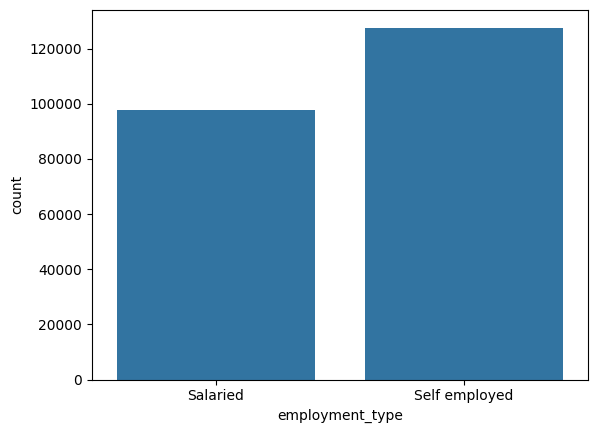

In [ ]:
sns.countplot(data=df,x='employment_type')

there are two different employment type given in this data 'Salaried' and 'Self employed' 

**7.Can a strategy be developed to deal with
 the missing values (if any)?**

In [9]:
# from privous analysis, we know that the employment_type has all the null values
# The employment_type column has 7,600 missing values, about 3.3% of the data. Since 'Self employed' is the majority class, we can fill missing values with it without affecting data quality.
df['employment_type'].fillna('Self employed', inplace=True)

In [ ]:
df.isnull().sum().sum()

np.int64(0)

**8.Use pie charts to express the different types of employment that
 define the defaulters and non-defaulters**

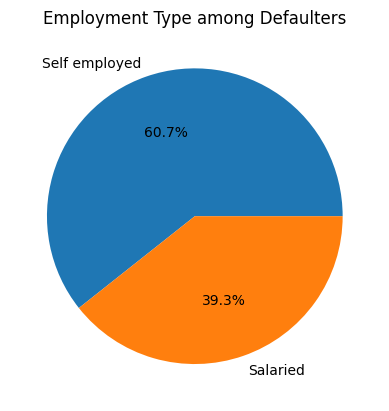

In [ ]:
defaulters = df[df['loan_default'] == 1]
non_defaulters = df[df['loan_default'] == 0]

defaulter_counts = defaulters['employment_type'].value_counts()
non_defaulter_counts = non_defaulters['employment_type'].value_counts()


plt.pie(defaulter_counts.values, labels=defaulter_counts.index, autopct='%1.1f%%')
plt.title('Employment Type among Defaulters')
plt.show()


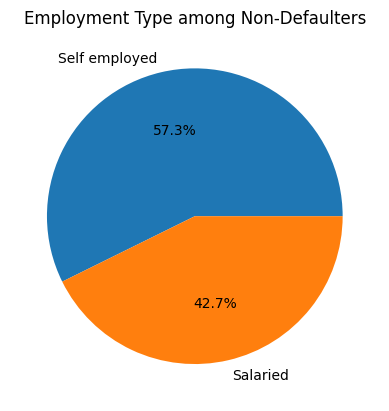

In [ ]:
plt.pie(non_defaulter_counts.values, labels=non_defaulter_counts.index, autopct='%1.1f%%')
plt.title('Employment Type among Non-Defaulters')
plt.show()


Self employed individuals make up a slightly higher proportion of defaulters compared to non-defaulters

 **9.Has age got anything to do with defaulting? What is the distribution of age w.r.t. to the
 defaulters and non-defaulters?**

In [10]:
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])
df['disbursaldate'] = pd.to_datetime(df['disbursaldate'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   uniqueid                             233154 non-null  int64         
 1   disbursed_amount                     233154 non-null  int64         
 2   asset_cost                           233154 non-null  int64         
 3   ltv                                  233154 non-null  float64       
 4   branch_id                            233154 non-null  int64         
 5   supplier_id                          233154 non-null  int64         
 6   manufacturer_id                      233154 non-null  int64         
 7   current_pincode_id                   233154 non-null  int64         
 8   date_of_birth                        233154 non-null  datetime64[ns]
 9   employment_type                      233154 non-null  object        
 

In [12]:
df['age'] = (pd.Timestamp.now() - df['date_of_birth']).dt.days // 365
df['age'].dtype

dtype('int64')

In [13]:
bins = [20, 30, 40, 50, 60, 70, 80]
df['binned'] = pd.cut(df['age'], bins=bins, labels=['20-29', '30-39', '40-49', '50-59', '60-69', '70-79'],right=False)
df['binned'].value_counts()

binned
30-39    95411
40-49    64401
50-59    37286
20-29    24454
60-69    11466
70-79      136
Name: count, dtype: int64

Text(0.5, 0, 'Age Group')

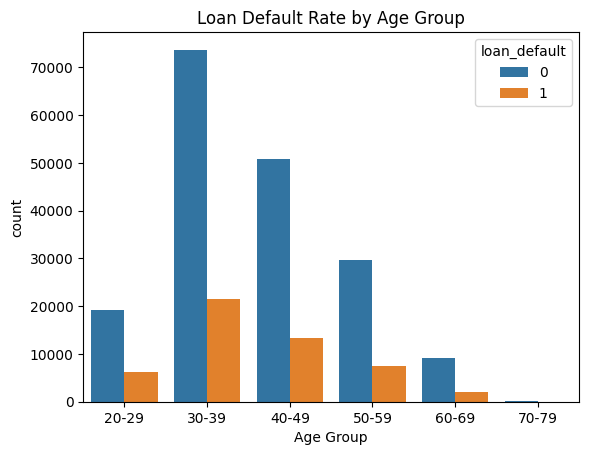

In [ ]:
sns.countplot(x='binned', hue='loan_default', data=df)
plt.title('Loan Default Rate by Age Group')
plt.xlabel('Age Group')

Age appears to influence loan defaulting, with defaults most common in the 30–49 age range. Younger 20–29 and older 60+ groups show fewer defaults, indicating middle-aged borrowers are more prone to default.

**10.What type of ID was presented by most of the customers for proof?**

In [ ]:
df.head(10)

,uniqueid,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,current_pincode_id,date_of_birth,employment_type,...,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,loan_default,age,binned
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,41,40-49
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,39,30-39
2,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,...,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1,47,40-49
3,529269,46349,61500,76.42,67,22807,45,1502,1988-06-01,Salaried,...,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,37,30-39
4,563215,43594,78256,57.50,67,22744,86,1499,1994-07-14,Self employed,...,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,31,30-39
5,498082,73123,92900,79.66,67,22807,45,1480,1989-01-02,Self employed,...,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,36,30-39
6,586411,55213,68600,83.09,67,22807,45,1494,1986-01-01,Salaried,...,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,39,30-39
7,440293,53713,61780,89.83,67,22807,45,1468,1968-08-02,Self employed,...,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1,56,50-59
8,566763,57713,68040,86.27,67,22807,45,1497,1976-01-01,Self employed,...,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1,49,40-49
9,525983,46549,69518,69.05,67,22744,86,1480,1990-05-23,Salaried,...,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,35,30-39


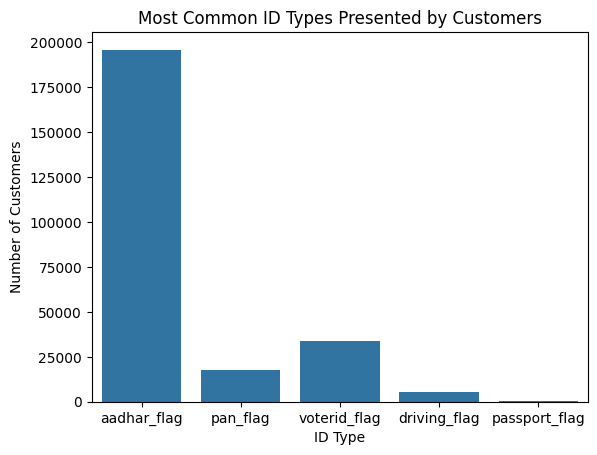

In [ ]:
id_flags = ['aadhar_flag', 'pan_flag', 'voterid_flag', 'driving_flag', 'passport_flag']

id_counts = df[id_flags].sum().reset_index()
id_counts.columns = ['ID Type', 'Count']

sns.barplot(x='ID Type', y='Count', data=id_counts)
plt.title('Most Common ID Types Presented by Customers')
plt.xlabel('ID Type')
plt.ylabel('Number of Customers')
plt.show()

most customers presented their Aadhar card as proof of identity followed by Voter ID and PAN card, while Driving License and Passport were the least commonly used.

**11.Study the credit bureau score distribution. Compare the distribution for defaulters vs. non
defaulters. Explore in detail**

<Axes: xlabel='score_bin', ylabel='count'>

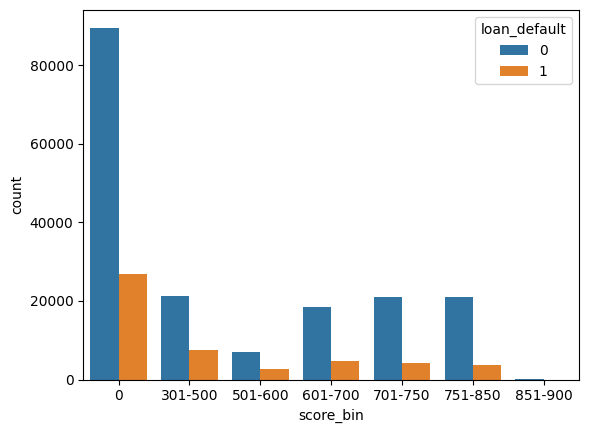

In [34]:
df['score_bin'] = pd.cut(df['perform_cns_score'], 
                         bins = [-1, 0.1, 500, 600, 700, 750, 850, 900], 
                         labels = ['0', '301-500', '501-600', '601-700', '701-750', '751-850', '851-900'])

sns.countplot(data=df, x='score_bin', hue='loan_default')

Customers with a credit score of 0 form the largest group of both defaulters and non-defaulters, but defaulters are disproportionately concentrated in the low or zero score bins while non-defaulters are more evenly spread across higher credit score ranges.

**12.Explore the primary and secondary account details. Is the information in some way related to 
the loan default probability?**

To answer this question:

I will perform hypothesis testing using MANOVA separately 
on primary and secondary account features.

Hypotheses:

H0 : The primary and secondary account details are not related to the loan default probability.

H1 : The primary or secondary account details are related to the loan default probability.

In [14]:
primary_df = df[['pri_no_of_accts','pri_active_accts','pri_overdue_accts','pri_current_balance','pri_sanctioned_amount','pri_disbursed_amount','primary_instal_amt','loan_default']]
secondary_df = df[['sec_no_of_accts','sec_active_accts','sec_overdue_accts','sec_current_balance','sec_sanctioned_amount','sec_disbursed_amount','sec_instal_amt','loan_default']]

primary_df_log = primary_df.copy()
primary_features = primary_df.columns.drop('loan_default')
primary_df_log[primary_features] = np.log1p(primary_df_log[primary_features].clip(lower=0))

secondary_df_log = secondary_df.copy()
secondary_features = secondary_df.columns.drop('loan_default')
secondary_df_log[secondary_features] = np.log1p(secondary_df_log[secondary_features].clip(lower=0))

In [ ]:
from statsmodels.multivariate.manova import MANOVA
dependent_vars_p = ' + '.join(primary_features)
formula = f'{dependent_vars_p} ~ loan_default'
maov_p = MANOVA.from_formula(formula, data=primary_df_log)
pvalue = maov_p.mv_test().results['loan_default']['stat'].iloc[0, -1]
print(f"{pvalue:.6f}")


0.000000


In [ ]:
dependent_vars_s = ' + '.join(secondary_features)
formula = f'{dependent_vars_s} ~ loan_default'
maov_s = MANOVA.from_formula(formula, data=secondary_df_log)
pvalue = maov_p.mv_test().results['loan_default']['stat'].iloc[0, -1]
print(f"{pvalue:.6f}")

0.000000


Since p-value < 0.05, we reject the null hypothesis

This indicates that there is a statistically significant relationship between account details and loan default probability.


**13.Is there a difference between the sanctioned and disbursed amount of primary and secondary 
loans? Study the difference by providing appropriate statistics and graphs**

Hypothesis

H0: There is no significant difference between the sanctioned and disbursed amounts for both primary and secondary loans.

H1: There is a significant difference between the sanctioned and disbursed amounts for either primary or secondary loans.

In [23]:
# Removing the top and bottom 1% of values to eliminate extreme outliers
# Not filltering disbursed amounts since most of their values lie near the top/bottom 1%.
for col in ['pri_sanctioned_amount','sec_sanctioned_amount']:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df = df[(df[col] >= lower) & (df[col] <= upper)]

In [24]:
df[['sec_sanctioned_amount','sec_disbursed_amount']].describe()

,sec_sanctioned_amount,sec_disbursed_amount
count,228513.000000,228513.000000
mean,147.688320,144.314026
std,2224.549931,2241.177891
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,49233.000000,120000.000000


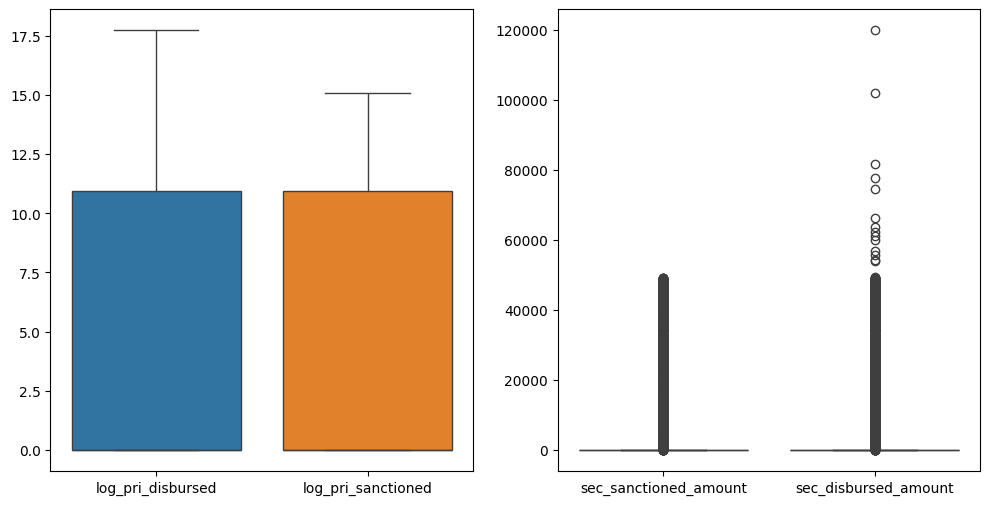

In [30]:
# Log transforming because the data is highly skewed
df['log_pri_sanctioned'] = np.log1p(df['pri_sanctioned_amount'])
df['log_pri_disbursed'] = np.log1p(df['pri_disbursed_amount'])
df['log_sec_sanctioned'] = np.log1p(df['sec_sanctioned_amount'])
df['log_sec_disbursed'] = np.log1p(df['sec_disbursed_amount'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

sns.boxplot(data=df[['log_pri_disbursed','log_pri_sanctioned']], ax=axes[0])

sns.boxplot(data=df[['sec_sanctioned_amount','sec_disbursed_amount']], ax=axes[1])

plt.show()

In [ ]:
# Performing a paired t-test to check if there is a significant difference between sanctioned and disbursed amounts
# H0: No difference between sanctioned and disbursed amounts
# H1: There is a significant difference

t_stat, p_val = ttest_rel(df['log_sec_sanctioned'], df['log_sec_disbursed'])
print(f"Secondary Loan T-Statistic: {t_stat}, P-Value: {p_val}")

t_stat, p_val = ttest_rel(df['log_pri_sanctioned'], df['log_pri_disbursed'])
print(f"primary Loan T-Statistic: {t_stat}, P-Value: {p_val}")

Secondary Loan T-Statistic: 5.013879231413565, P-Value: 5.338325876234685e-07
primary Loan T-Statistic: 15.448834841495067, P-Value: 8.179816794566171e-54


Extremely low p-values indicate a significant difference between sanctioned and disbursed amounts for both loan types.


In [31]:
df['log_sec_diff'] = df['log_sec_sanctioned'] - df['log_sec_disbursed']
df['log_pri_diff'] = df['log_pri_sanctioned'] - df['log_pri_disbursed']

# Using independent t-test since primary and secondary loans are from different sources
t_stat, p_val = ttest_ind(df['log_pri_diff'], df['log_sec_diff'])
print(f"primary Loan T-Statistic: {t_stat}, P-Value: {p_val}")

primary Loan T-Statistic: 14.18596592221341, P-Value: 1.1444538266947455e-45


Since p-value < 0.05, we reject the null hypothesis

a significant difference exists between the average gaps.


**14.Do customer who make higher number of enquiries end up being higher risk candidates?**

Hypothesis

H0: The number of customer inquiries has no significant association with the likelihood of loan default.

H1: A higher number of customer inquiries is significantly associated with a greater risk of loan default.

<Axes: xlabel='no_of_inquiries', ylabel='count'>

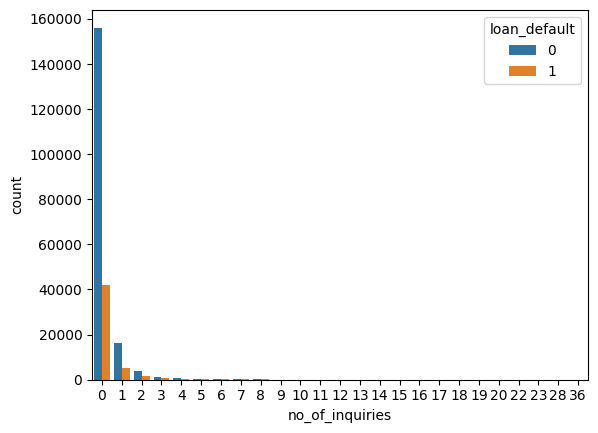

In [ ]:
sns.countplot(data=df,x='no_of_inquiries',hue='loan_default')

In [32]:
# binning Manual because most values are 0 
bins = [0, 1, 2, 4, df['no_of_inquiries'].max() + 1]
labels = ['0', '1', '2-3', '4+']

df['inquiry_quartile'] = pd.cut(df['no_of_inquiries'], bins=bins, labels=labels, right=False)
chi = chi2_contingency(pd.crosstab(df['inquiry_quartile'], df['loan_default']))
print(f'p-value: {chi[1]}')

p-value: 2.5678166204929176e-108


Since p-value < 0.05, we reject the null hypothesis

There is a statistically significant link between the number of inquiries and loan default. customers who make more inquiries tend to have a higher chance of defaulting.

**15.Is credit history, that is new loans in last six months, loans defaulted in last six months, time 
since first loan, etc., a significant factor in estimating probability of loan defaulters**

H0: Credit history variables have no significant association with loan default.

H1: Credit history variables have a statistically significant association with loan default.

<Axes: xlabel='delinquent_accts_in_last_six_months', ylabel='count'>

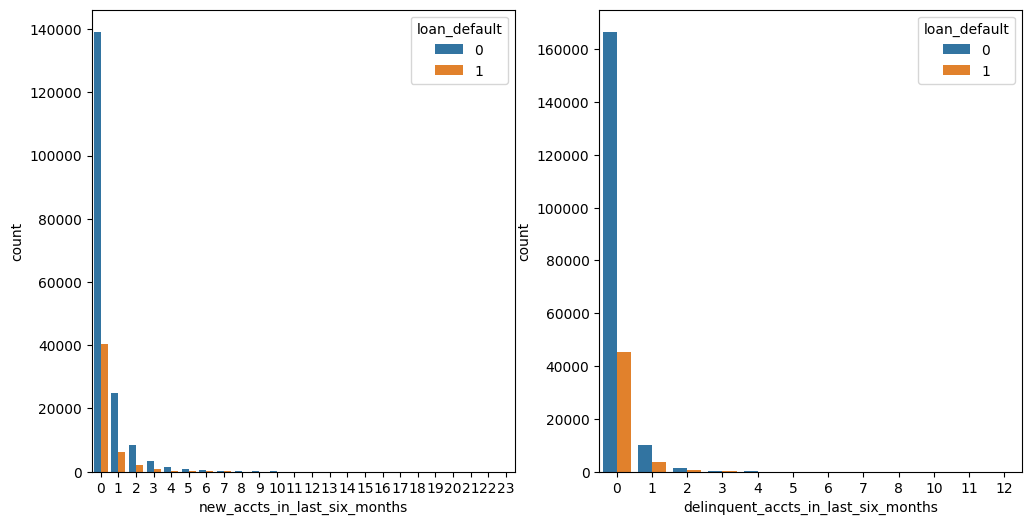

In [ ]:
figs,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6))

sns.countplot(data=df,x='new_accts_in_last_six_months',hue='loan_default',ax=axes[0])
sns.countplot(data=df,x='delinquent_accts_in_last_six_months',hue='loan_default',ax=axes[1])

In [26]:
bins = [0, 1, 3, 5, df['new_accts_in_last_six_months'].max()+1]
labels = ['0', '1-2', '3-4', '5+']
df['new_accts_bin'] = pd.cut(df['new_accts_in_last_six_months'], bins=bins, labels=labels,right=False)

bins = [0, 1, 2, df['delinquent_accts_in_last_six_months'].max()+1]
labels = ['0', '1', '2+']
df['delinq_accts_bin'] = pd.cut(df['delinquent_accts_in_last_six_months'], bins=bins, labels=labels,right=False,)

chi_new_accts_bin = chi2_contingency(pd.crosstab(df['new_accts_bin'], df['loan_default']))
chi_delinq_accts_bin = chi2_contingency(pd.crosstab(df['delinq_accts_bin'], df['loan_default']))

print(f'new accts p-value: {chi_new_accts_bin[1]}, delinquent accts p-value: {chi_delinq_accts_bin[1]}')

new accts p-value: 1.7194486547005212e-47, delinquent accts p-value: 3.2937429363595407e-85


Since p-value < 0.05, we reject the null hypothesis

There is a statistically significant association between both new_accts_in_last_six_months and delinquent_accts_in_last_six_months with loan defaults p-values < 0.05

This suggests that customers with more recent or delinquent accounts are more likely to default on their loans.

**16.Perform logistic regression modeling, predict the outcome for the test data, and validate the 
results using the confusion matrix**

preparing the data for logistic regression

In [35]:
ML_df = df.drop(columns=(['binned','score_bin','log_pri_sanctioned','log_pri_disbursed','log_sec_sanctioned','log_sec_disbursed','log_sec_diff','log_pri_diff','inquiry_quartile','new_accts_bin','delinq_accts_bin']))
ML_df['employment_type'] = ML_df['employment_type'].replace({'Salaried':1,'Self employed':0})
ML_df['perform_cns_score_description'] = ML_df['perform_cns_score_description'].replace({

                'A-Very Low Risk': 1,'B-Very Low Risk': 2,'C-Very Low Risk': 3,'D-Very Low Risk': 4,
                'E-Low Risk': 5,'F-Low Risk': 6,'G-Low Risk': 7,'H-Medium Risk': 8,'I-Medium Risk': 9,
                'J-High Risk': 10,'K-High Risk': 11,'L-Very High Risk': 12,'M-Very High Risk': 13,

                # Grouped "Not Scored" and "No Bureau History"
                'No Bureau History Available': 0,'Not Scored: No Updates available in last 36 months': 0,
                'Not Scored: Not Enough Info available on the customer': 0,'Not Scored: No Activity seen on the customer (Inactive)': 0,
                'Not Scored: Sufficient History Not Available': 0,'Not Scored: Only a Guarantor': 0
                })

In [557]:
ML_df['mobileno_avl_flag'].value_counts()

mobileno_avl_flag
1    228513
Name: count, dtype: int64

In [36]:
# Mobileno_avl_flag was removed due to zero variance, and uniqueid was dropped as it is a non-informative identifier unique to each record.
ML_df = ML_df.drop(columns=['uniqueid','mobileno_avl_flag'])

In [37]:
# converting average_acct_age,credit_history_lengt into numerical
def to_months(x):
    try:
        years = int(x.split('yrs')[0].strip())
        months = int(x.split('yrs')[1].split('mon')[0].strip())
        return years * 12 + months
    except:
        return 0

ML_df['average_acct_age'] = df['average_acct_age'].apply(to_months)
ML_df['credit_history_length'] = df['credit_history_length'].apply(to_months)
ML_df.head(5)

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,current_pincode_id,date_of_birth,employment_type,disbursaldate,...,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,loan_default,age
0,50578,58400,89.55,67,22807,45,1441,1984-01-01,1,2018-08-03,...,0,0,0,0,0,0,0,0,0,41
1,53278,61360,89.63,67,22807,45,1497,1985-08-24,0,2018-08-01,...,0,0,0,0,0,0,0,0,0,40
2,52378,60300,88.39,67,22807,45,1495,1977-12-09,0,2018-09-26,...,0,0,0,0,0,0,0,1,1,47
3,46349,61500,76.42,67,22807,45,1502,1988-06-01,1,2018-09-23,...,0,0,0,0,0,0,0,0,0,37
4,43594,78256,57.50,67,22744,86,1499,1994-07-14,0,2018-10-08,...,0,0,0,0,0,0,0,0,0,31


In [38]:
ML_df['loan_age_months'] = (pd.to_datetime('today') - pd.to_datetime(ML_df['disbursaldate'])).dt.days // 30
ML_df.drop(['date_of_birth', 'disbursaldate'], axis=1, inplace=True)
ML_df.head(5)

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,current_pincode_id,employment_type,state_id,employee_code_id,...,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,loan_default,age,loan_age_months
0,50578,58400,89.55,67,22807,45,1441,1,6,1998,...,0,0,0,0,0,0,0,0,41,86
1,53278,61360,89.63,67,22807,45,1497,0,6,1998,...,0,0,0,0,0,0,0,0,40,86
2,52378,60300,88.39,67,22807,45,1495,0,6,1998,...,0,0,0,0,0,0,1,1,47,84
3,46349,61500,76.42,67,22807,45,1502,1,6,1998,...,0,0,0,0,0,0,0,0,37,84
4,43594,78256,57.50,67,22744,86,1499,0,6,1998,...,0,0,0,0,0,0,0,0,31,84


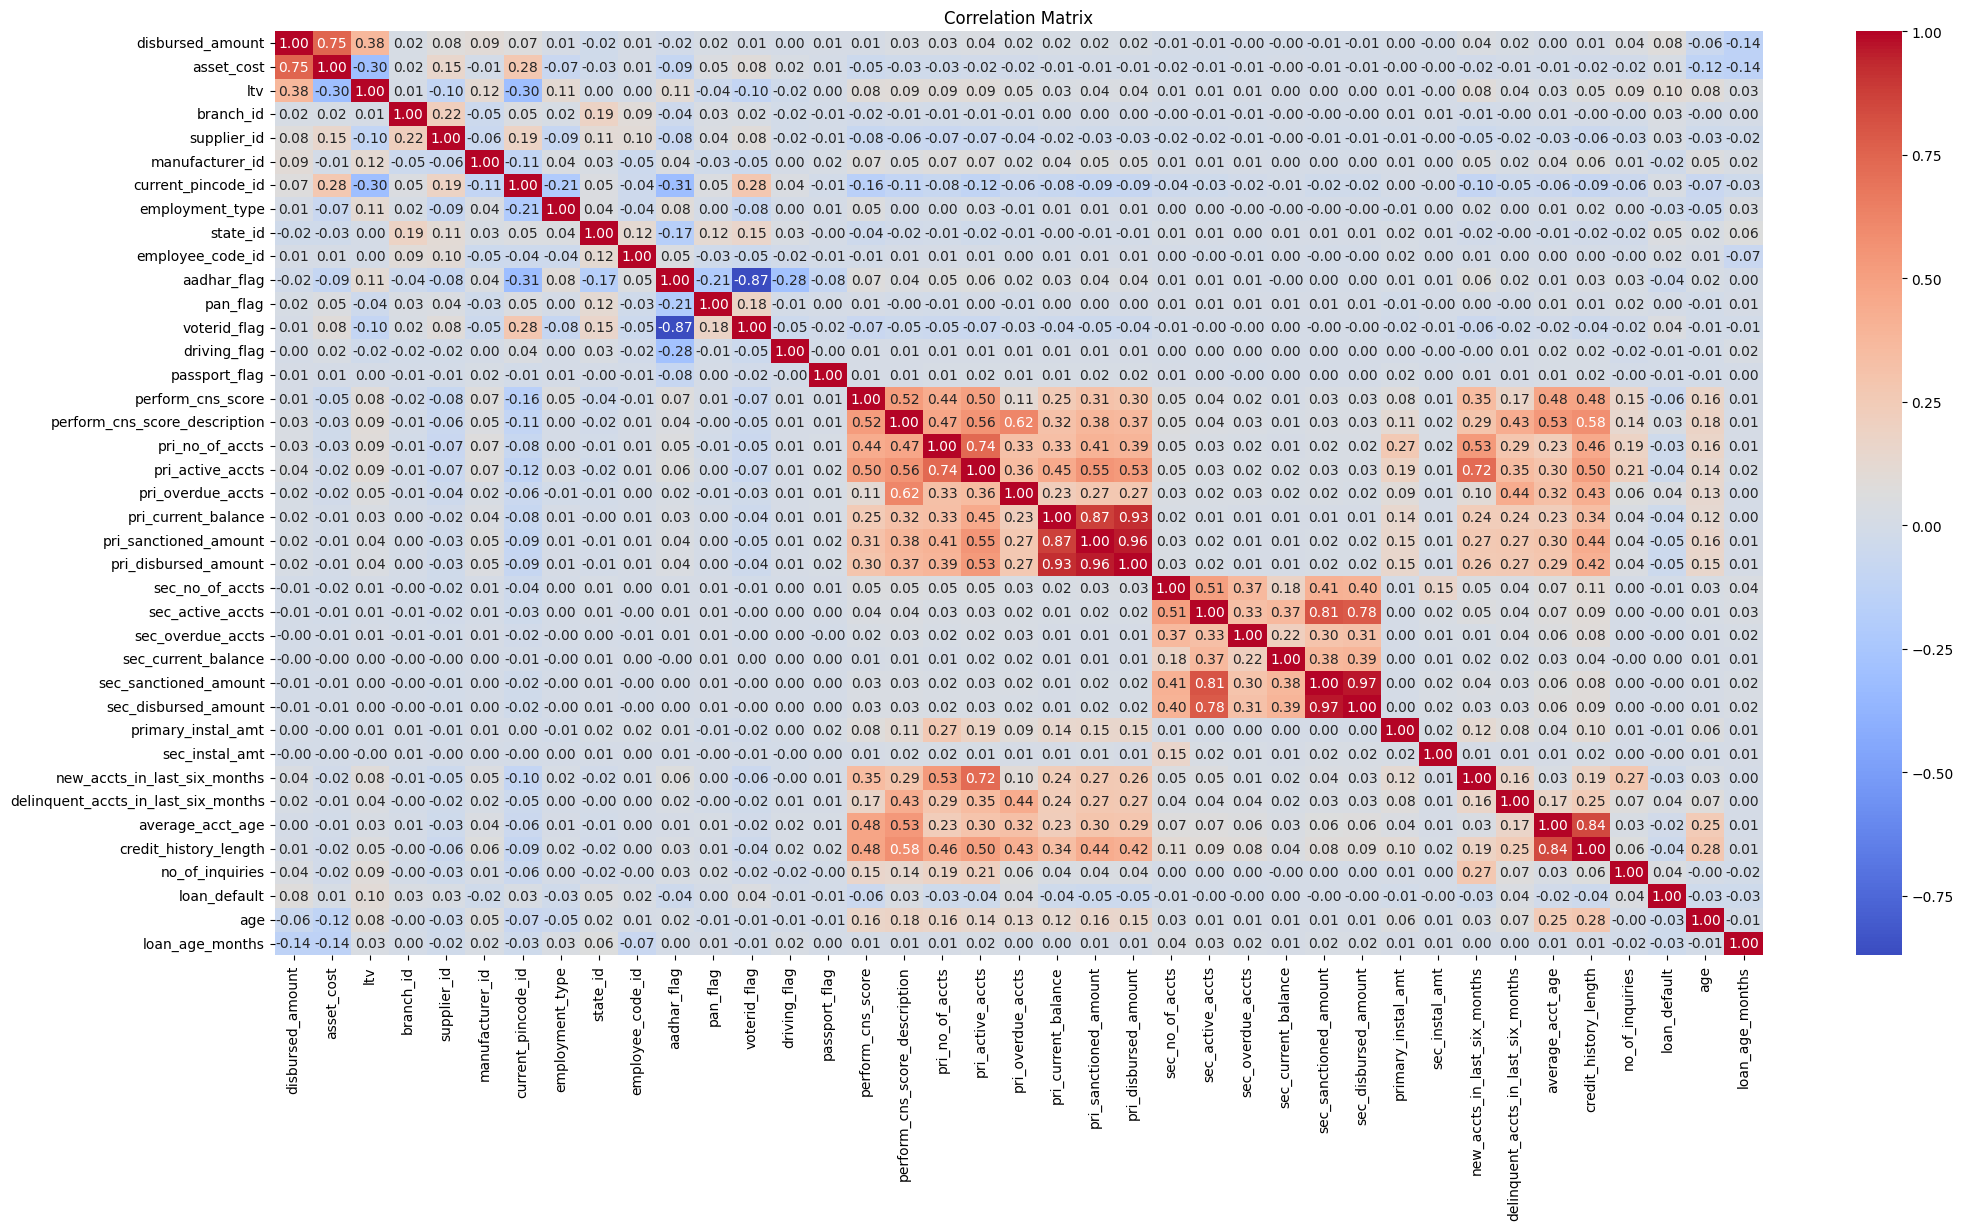

In [561]:
corr_matrix = ML_df.corr()
plt.figure(figsize=(24,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

To reduce redundancy and address multicollinearity, features with high correlation will be removed.

In [39]:
ML_df['pri_sanction_gap'] = ML_df['pri_sanctioned_amount'] - ML_df['pri_disbursed_amount']
ML_df['sec_sanction_gap'] = ML_df['sec_sanctioned_amount'] - ML_df['sec_disbursed_amount']

ML_df.drop(columns=[
                    'pri_sanctioned_amount','sec_sanctioned_amount',
                    'pri_disbursed_amount','sec_disbursed_amount',  # Dropping sanctioned and disbursed amount columns as they are replaced by sanction gap features
                    'pri_no_of_accts','sec_no_of_accts',            # Dropping no_of_accts because they are highly correlated with active_accts
                    'pri_current_balance','sec_current_balance',    # Dropping current_balance because they are highly correlated with sanctioned_amount 
                    'perform_cns_score_description',                # Dropping perform_cns_score_description for being derived from perform_cns_score
                    'average_acct_age'                              # Dropping average_acct_age for being highly correlated with credit_history_length
                    ],inplace=True)

In [563]:
import statsmodels.api as sm

x_train = ML_df.drop(columns='loan_default')
y_train = ML_df['loan_default']
X = sm.add_constant(x_train)
model = sm.Logit(y_train, X)

result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.507416
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           loan_default   No. Observations:               228513
Model:                          Logit   Df Residuals:                   228482
Method:                           MLE   Df Model:                           30
Date:                Tue, 15 Jul 2025   Pseudo R-squ.:                 0.03296
Time:                        15:51:36   Log-Likelihood:            -1.1595e+05
converged:                       True   LL-Null:                   -1.1990e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   1.7085      0.436 

In [ ]:
# Columns with high p-values were dropped as they didn’t show a statistically significant impact on loan default
ML_df.drop(columns=[
    'voterid_flag',
    'sec_active_accts',
    'sec_overdue_accts',
    'sec_instal_amt',
    'new_accts_in_last_six_months',
    'pri_sanction_gap',
    'sec_sanction_gap'
], inplace=True)

In [564]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

x = ML_df.drop(columns='loan_default')  
y = ML_df['loan_default']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=72, stratify=y)

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import (accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5725882327199527
Precision: 0.2855026929982047
Recall: 0.6376303127506014
F1 Score: 0.39440724206349204

Confusion Matrix:
[[19808 15919]
 [ 3615  6361]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.55      0.67     35727
           1       0.29      0.64      0.39      9976

    accuracy                           0.57     45703
   macro avg       0.57      0.60      0.53     45703
weighted avg       0.72      0.57      0.61     45703



**Despite the challenge of class imbalance, the model achieved a decent recall for defaulters which is pretty important in loan risk prediction. The overall accuracy and precision weren’t very high, More advanced models like decision trees or random forests might do better but since the task asked for logistic regression, the results are still meaningful and fulfill the goal of the analysis.**

.............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................